In [1]:
# Importar bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Seleccionar los datos
datos = pd.read_csv('Cleaned-Data.csv')
datos.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [3]:
# Elegir la variable objetivo en este caso 'Severity_None'
X = datos.drop('Severity_None', axis=1)  # Variables predictoras

# Codificar variables categóricas (one-hot encoding) - Esto dado que country es de tipo String
X = pd.get_dummies(X, columns=['Country'], drop_first=True)

# Colocar la variable objetivo cono númerica 
y = datos['Severity_None'].astype(int)  # Variable objetivo

In [4]:
# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

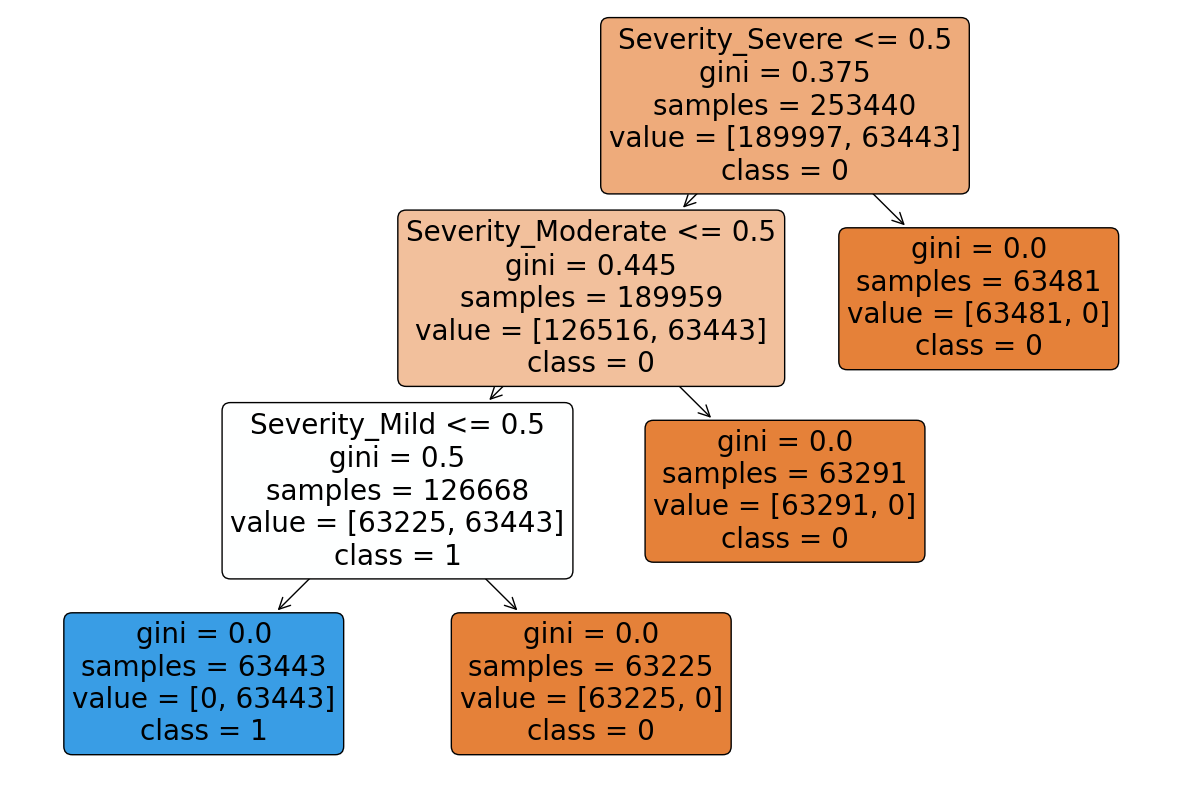

In [6]:
# Plotear el árbol de decisión
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=list(X.columns), class_names=[str(c) for c in model.classes_], filled=True, rounded=True)
plt.show()


In [7]:
# Obtener la representación textual del árbol con detalles
tree_rules = export_text(model, feature_names=list(X.columns), show_weights=True)
print("\nReglas del árbol de decisión con detalles:")
print(tree_rules)


Reglas del árbol de decisión con detalles:
|--- Severity_Severe <= 0.50
|   |--- Severity_Moderate <= 0.50
|   |   |--- Severity_Mild <= 0.50
|   |   |   |--- weights: [0.00, 63443.00] class: 1
|   |   |--- Severity_Mild >  0.50
|   |   |   |--- weights: [63225.00, 0.00] class: 0
|   |--- Severity_Moderate >  0.50
|   |   |--- weights: [63291.00, 0.00] class: 0
|--- Severity_Severe >  0.50
|   |--- weights: [63481.00, 0.00] class: 0



# Análisis del Árbol de Decisión para la Clasificación de Pacientes en Casos de COVID-19
### Interpretación del arbol de decisión

**Primer Nivel (Raíz):**
El árbol inicia evaluando la variable Severity_Severe. Si esta variable, que representa la severidad de los síntomas, es menor o igual a 0.50, se avanza al siguiente nivel. En caso contrario, se clasifica como "No COVID" (clase 0). Este primer paso establece la importancia de la gravedad de los síntomas como criterio inicial.

**Segundo Nivel:**
Si Severity_Severe es menor o igual a 0.50, se procede a evaluar la variable Severity_Moderate. Si esta última es menor o igual a 0.50, se avanza al siguiente nivel. De lo contrario, se clasifica como "No COVID" (clase 0). Este nivel añade una capa de complejidad, considerando la moderación de la severidad como un factor adicional en la clasificación.

**Tercer Nivel (Hojas):**
Si Severity_Moderate es menor o igual a 0.50 en el segundo nivel, el árbol evalúa la variable Severity_Mild. Si esta variable es menor o igual a 0.50, se clasifica como "COVID" (clase 1). De lo contrario, se clasifica como "No COVID" (clase 0). Este último nivel determina la clasificación final, priorizando nuevamente la gravedad de los síntomas. La decisión es que si la severidad es leve, el modelo clasifica como "COVID"; de lo contrario, clasifica como "No COVID".

El árbol de decisión destaca la relevancia de la severidad de los síntomas en la clasificación de pacientes con respecto a la enfermedad por COVID-19. El enfoque en las variables de severidad demuestra la importancia de considerar la intensidad de los síntomas para determinar la probabilidad de infección.

**Importancia en el mundo real**
En situaciones de pandemia, la gravedad de los síntomas puede ser un indicador crucial para la identificación temprana y la toma de decisiones clínicas. Pacientes con síntomas severos podrían requerir intervenciones más urgentes o un aislamiento más estricto. Este enfoque del modelo refleja la lógica médica, donde la intensidad de los síntomas es un factor central en la evaluación y gestión de enfermedades.

En resumen, este análisis destaca la importancia de la gravedad de los síntomas en la clasificación de pacientes y proporciona una visión más profunda de cómo el modelo toma decisiones críticas en el contexto de la enfermedad por COVID-19.


In [8]:
# Calcular la matriz de confusión
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular las métricas
correct_classified = conf_matrix[0, 0] + conf_matrix[1, 1]
cohen_kappa = cohen_kappa_score(y_test, y_pred)
wrong_classified = conf_matrix[0, 1] + conf_matrix[1, 0]
accuracy = accuracy_score(y_test, y_pred)
error = 1 - accuracy

# Imprimir las métricas
print("Correct classified:", correct_classified)
print("Cohen's Kappa:", cohen_kappa)
print("Wrong Classified:", wrong_classified)
print("Accuracy:", accuracy)
print("Error:", error)

Correct classified: 63360
Cohen's Kappa: 1.0
Wrong Classified: 0
Accuracy: 1.0
Error: 0.0


# Análisis de las métricas de rendimiento del modelo.

**Clasificaciones Correctas (Correct classified):** El modelo acierta en 63,360 clasificaciones, resaltando su efectividad al identificar la clasificación de pacientes según la severidad de los síntomas. Este alto número de clasificaciones correctas indica una capacidad robusta del modelo para realizar predicciones precisas.

**Coeficiente Kappa de Cohen (Cohen's Kappa):** El cohen's Kappa es de 1.0. Lo indica una métrica perfecta. Es decir, teniendo en cuenta la posibilidad de que las clasificaciones puedan haber ocurrido al azar. Un valor cercano a 1 indica una concordancia muy alta, lo que sugiere que el modelo está realizando predicciones significativas en lugar de simplemente adivinar al azar.

**Precisión (Acurracy):** El modelo muestra una precisión del 100%. Esto significa que el 100% de las predicciones realizadas por el modelo son correctas. Esta es una métrica importante, ya que indica la proporción de predicciones acertadas en el conjunto de datos de prueba

Estas métricas respaldan la capacidad del modelo para realizar predicciones precisas y significativas en la identificación de pacientes con base en la severidad de los síntomas. Sin embargo, dado que sus metricas son perfectas es recomendable una validación adicional para garantizar la generalización del modelo a nuevos datos y aplicabilidad a entornos reales. 